In [4]:
import pandas as pd
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import glob

In [30]:
xy_list = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar', 'Max Heart Rate']
x_list = ['Age', 'Sex', 'Systolic BP', 'Fasting Blood Sugar', 'Max Heart Rate', 'Cholesterol', 'Data Set']
y_list = ['Result']

In [31]:
all_files = glob.glob('./Cleaned Data/*.csv')
all_files

['./Cleaned Data\\Framingham1.csv',
 './Cleaned Data\\Kaggle2.csv',
 './Cleaned Data\\Mendeley1.csv',
 './Cleaned Data\\Mendeley1_cleaned.csv',
 './Cleaned Data\\UCI Heart Disease.csv']

In [32]:
data = []

for filename in all_files:
    data.append( pd.read_csv(filename))

df = pd.concat(data, axis=0, ignore_index=True)
df = df[x_list + y_list]
df['Result'] = df['Result'].apply(lambda x: 1 if x != 0 else 0)

In [41]:
# replace 0 with NA in cholesterol
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x.startswith == 'M' else 0)
df.dropna(inplace = True)


AttributeError: 'int' object has no attribute 'startswith'

In [42]:
# run a SVM to predict the Result 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[xy_list]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)



0.7738287560581584

In [ ]:
# plot distribution of y 
plt.hist(X['Cholesterol'])

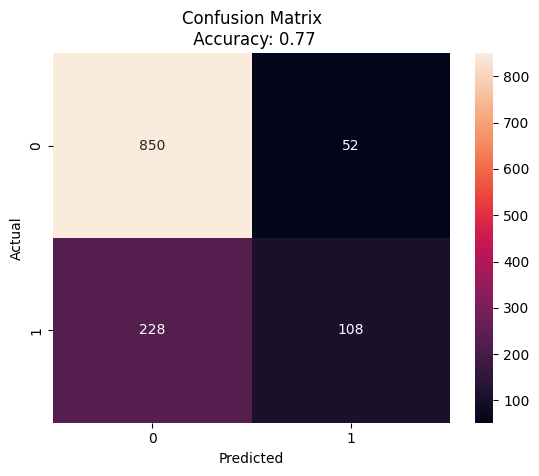

In [49]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# add the title to the confusion matrix
plt.title('Confusion Matrix\n Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual')
plt.show()

# check if it is a significant model
from sklearn.model_selection import cross_val_score



In [50]:
a = cross_val_score(clf, X, y, cv=5)